**RQ1: How much does the inflation rate influence the size and performance of the model?**

Experimental Setup:

10 (will be 30 for the final version) Monte Carlo Runs for 18 Datasets with the fixed configurations:


config_all = {

    'pop_size': 50, #will be 200 for final version
    'n_iter': 300,  #will be 2000 for final version
    'elitism': True,
    'n_elites': 1,
    'init_depth': 6,
    'initializer': 'rhh',
    'tournament_size': 2,
    'prob_const': 0.2,
    'tree_functions': ['add', 'subtract', 'multiply', 'divide'],
    'tree_constants': np.linspace(-10, 10, num=201).round(1).tolist(),
    'fitness_function': sigmoid_rmse,
    'minimization' : True,
    'seed': None, #based on monte_carlo_run
    'log_path' : None, #based on monte_carlo_run
    'verbose': False,
    'log_level': 0,
    'test_elite': True

}

basic_config_slim= {

    'slim_version': None, #for all versions
    'ms_lower': 0,
    'ms_upper': 1,
    'p_inflate': [0.1, 0.3, 0.5, 0.7, 0.9],
    'reconstruct': True,
    'copy_parent': True

}


In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath("../"))
from analysis import *


In [2]:
%%capture
ana_inf = InflationrateAnalysis('inflationrate')

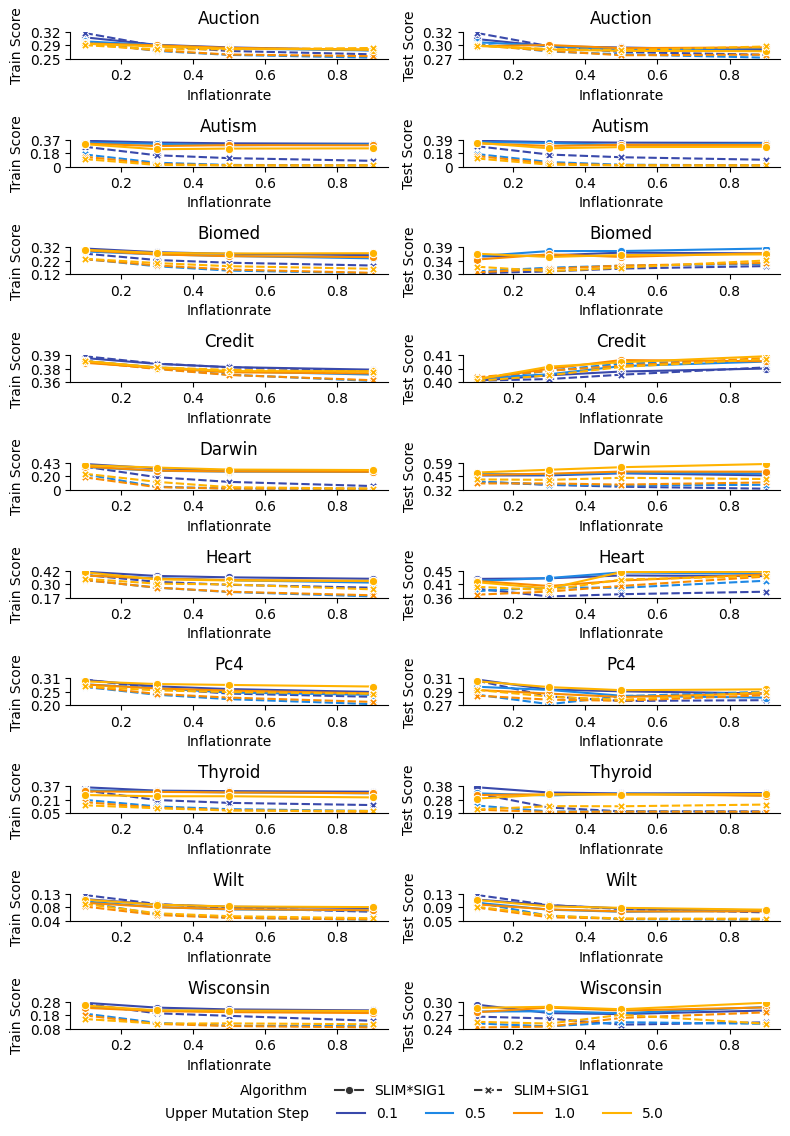

In [3]:
ana_inf.performance_by_p_inflate_plot[0]

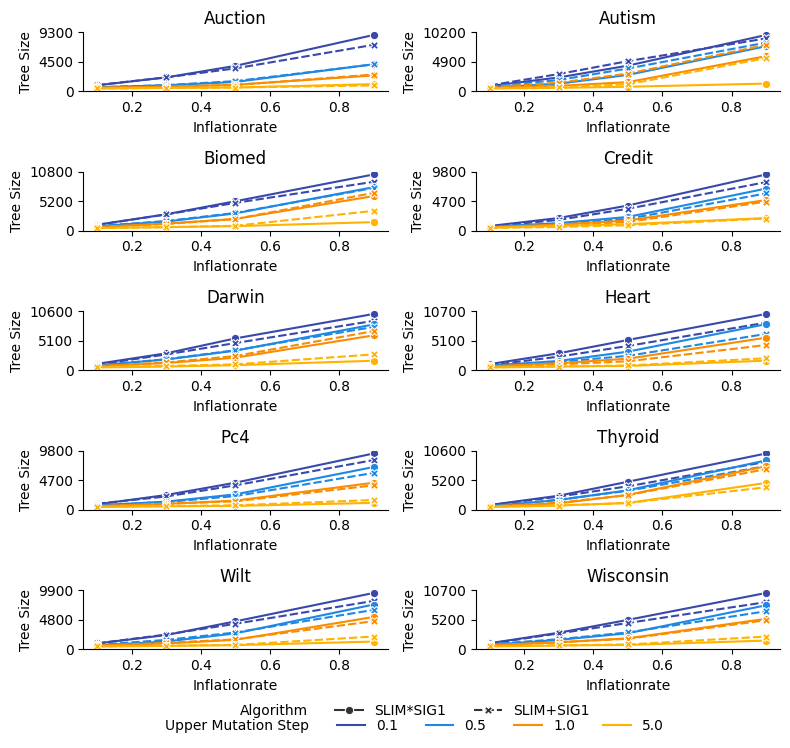

In [4]:
ana_inf.tree_size_by_p_inflate_plot[0]

In [5]:
ana_inf.tradeoff_table

Dataset    Version Inflationrate      Upper MS         RMSE          \
                                     R    T        R    T       R       T   
0     Auction  SLIM*SIG1           0.9  0.5      5.0  5.0  0.2863  0.2870   
1     Auction  SLIM+SIG1           0.9  0.5      0.5  1.0  0.2740  0.2786   
2      Autism  SLIM*SIG1           0.3  0.3      5.0  5.0  0.2563  0.2563   
3      Autism  SLIM+SIG1           0.9  0.3      5.0  5.0  0.0000  0.0113   
4      Biomed  SLIM*SIG1           0.1  0.1      1.0  1.0  0.3450  0.3450   
5      Biomed  SLIM+SIG1           0.1  0.1      0.1  1.0  0.2996  0.3023   
6      Credit  SLIM*SIG1           0.1  0.1      0.1  0.1  0.3976  0.3976   
7      Credit  SLIM+SIG1           0.1  0.1      5.0  5.0  0.3975  0.3975   
8      Darwin  SLIM*SIG1           0.1  0.1      0.1  1.0  0.4603  0.4644   
9      Darwin  SLIM+SIG1           0.9  0.3      0.1  0.5  0.3274  0.3686   
10      Heart  SLIM*SIG1           0.3  0.3      5.0  5.0  0.3912  0.3912   
11      Heart  SLIM+SIG1           0.3  0.1      0.1  1.0  0.3652  0.3710   
12        Pc4  SLIM*SIG1           0.9  0.5      0.5  1.0  0.2807  0.2817   
13        Pc4  SLIM+SIG1           0.3  0.3      0.5  0.5  0.2714  0.2714   
14    Thyroid  SLIM*SIG1           0.1  0.1      5.0  5.0  0.2906  0.2906   
15    Thyroid  SLIM+SIG1           0.3  0.1      1.0  1.0  0.1948  0.2103   
16       Wilt  SLIM*SIG1           0.5  0.5      0.5  1.0  0.0804  0.0813   
17       Wilt  SLIM+SIG1           0.9  0.5      0.5  5.0  0.0584  0.0613   
18  Wisconsin  SLIM*SIG1           0.5  0.1      0.1  1.0  0.2685  0.2726   
19  Wisconsin  SLIM+SIG1           0.1  0.1      1.0  1.0  0.2398  0.2398   

    RMSE % Tree Size         Tree Size %  
                   R       T              
0    +0.2%     796.5   251.0      -68.5%  
1    +1.7%    4052.5   660.0      -83.7%  
2    +0.0%     205.0   205.0        0.0%  
3    +inf%    5542.0   346.5      -93.7%  
4    +0.0%     290.0   290.0        0.0%  
5    +0.9%     706.5   323.0      -54.3%  
6    +0.0%     448.0   448.0        0.0%  
7    +0.0%     109.0   109.0        0.0%  
8    +0.9%     778.5   344.0      -55.8%  
9   +12.6%    8845.5  1659.5      -81.2%  
10   +0.0%     288.5   288.5        0.0%  
11   +1.6%    2143.5   289.0      -86.5%  
12   +0.3%    7002.0  1175.5      -83.2%  
13   +0.0%     945.0   945.0        0.0%  
14   +0.0%     207.0   207.0        0.0%  
15   +8.0%    1006.0   293.0      -70.9%  
16   +1.1%    2389.5  1262.5      -47.2%  
17   +5.0%    6500.0   370.0      -94.3%  
18   +1.5%    5153.5   355.5      -93.1%  
19   +0.0%     360.0   360.0        0.0%

In [6]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
X = ana_inf.results[['config.p_inflate', 'config.ms_upper']]
y = ana_inf.results['nodes_count']
lr = LinearRegression()
lr.fit(X, y)
r2_score(y, lr.predict(X))

0.7364548153183972

In [7]:
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split

# Features and target
X = ana_inf.results[['config.p_inflate', 'config.ms_upper']]
y = ana_inf.results['nodes_count']
X['comb'] = X['config.p_inflate'] * X['config.ms_upper']
# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant term for intercept
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# --- Linear Model ---
model_linear = sm.OLS(y_train, X_train_const).fit()
y_pred_linear = model_linear.predict(X_test_const)
r2_linear = model_linear.rsquared  # training R²

print("\n=== Linear Model Summary ===")
print(model_linear.summary())
print(f"\nLinear Model R² on test set: {r2_linear:.4f}")
# --- Exponential Model (log-transformed y) ---
log_y_train = np.log(y_train)
model_exp = sm.OLS(log_y_train, X_train_const).fit()
log_y_pred_exp = model_exp.predict(X_test_const)
y_pred_exp = np.exp(log_y_pred_exp)
r2_exp = 1 - np.sum((y_test - y_pred_exp)**2) / np.sum((y_test - np.mean(y_test))**2)

print("\n=== Exponential Model Summary ===")
print(model_exp.summary())
print(f"\nExponential Model R² on test set: {r2_exp:.4f}")


=== Linear Model Summary ===
                            OLS Regression Results                            
Dep. Variable:            nodes_count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     3412.
Date:                Sat, 10 May 2025   Prob (F-statistic):               0.00
Time:                        12:24:03   Log-Likelihood:                -17238.
No. Observations:                2048   AIC:                         3.448e+04
Df Residuals:                    2044   BIC:                         3.451e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const     

C:\Users\leond\AppData\Local\Temp\ipykernel_41148\2780955753.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['comb'] = X['config.p_inflate'] * X['config.ms_upper']


In [8]:
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

# Features and target
X = ana_inf.results[['config.p_inflate', 'config.ms_upper']]
y = ana_inf.results['nodes_count']

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Robust model (Huber Regression)
hub_reg = HuberRegressor()
hub_reg.fit(X_train, y_train)

# Predictions
y_pred_hub = hub_reg.predict(X_test)

# R^2 score
r2_hub = r2_score(y_test, y_pred_hub)

print(f"Robust Regression (Huber) R²: {r2_hub:.4f}")


Robust Regression (Huber) R²: 0.7283


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare features and target
X = ana_inf.results[['config.p_inflate', 'config.ms_upper', 'dataset', 'algorithm']]
X = pd.get_dummies(X, columns=['dataset', 'algorithm'], prefix='dataset', drop_first=True)
y = ana_inf.results['nodes_count']

# Log-transform the target variable
log_y = np.log(y)

# Train-test split (80/20)
X_train, X_test, y_train_log, y_test_log = train_test_split(X, log_y, test_size=0.2, random_state=42)

# Fit linear model on log-transformed y
lr = LinearRegression()
lr.fit(X_train, y_train_log)

# Predict log(y) and exponentiate to get predictions in original scale
log_y_pred_test = lr.predict(X_test)
y_pred_test = np.exp(log_y_pred_test)
y_test_original = np.exp(y_test_log)

# R² score on original scale
r2 = r2_score(y_test_original, y_pred_test)
print("Exponential model R² (test set):", r2)


Exponential model R² (test set): 0.8354200094606009


In [10]:
lr.coef_, lr.intercept_

(array([ 3.43434661e+00, -3.29703763e-01,  4.90393546e-01,  6.50603418e-01,
         3.60545791e-01,  6.73810984e-01,  4.99116851e-01,  2.75397502e-01,
         7.80583300e-01,  2.16709971e-03,  5.94417395e-01,  5.56030481e-03]),
 5.587075087067237)

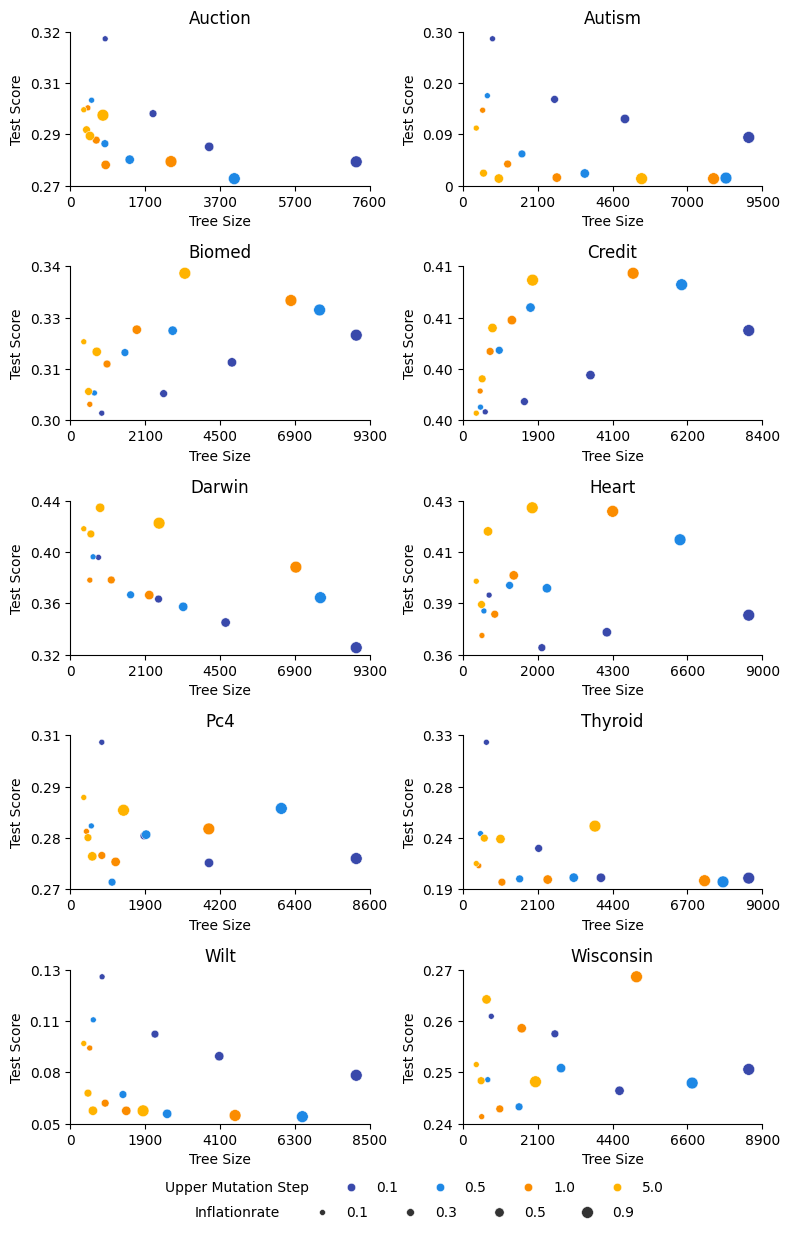

In [11]:
ana_inf.performance_complexity_tradeoff_plussig1_plot[0]

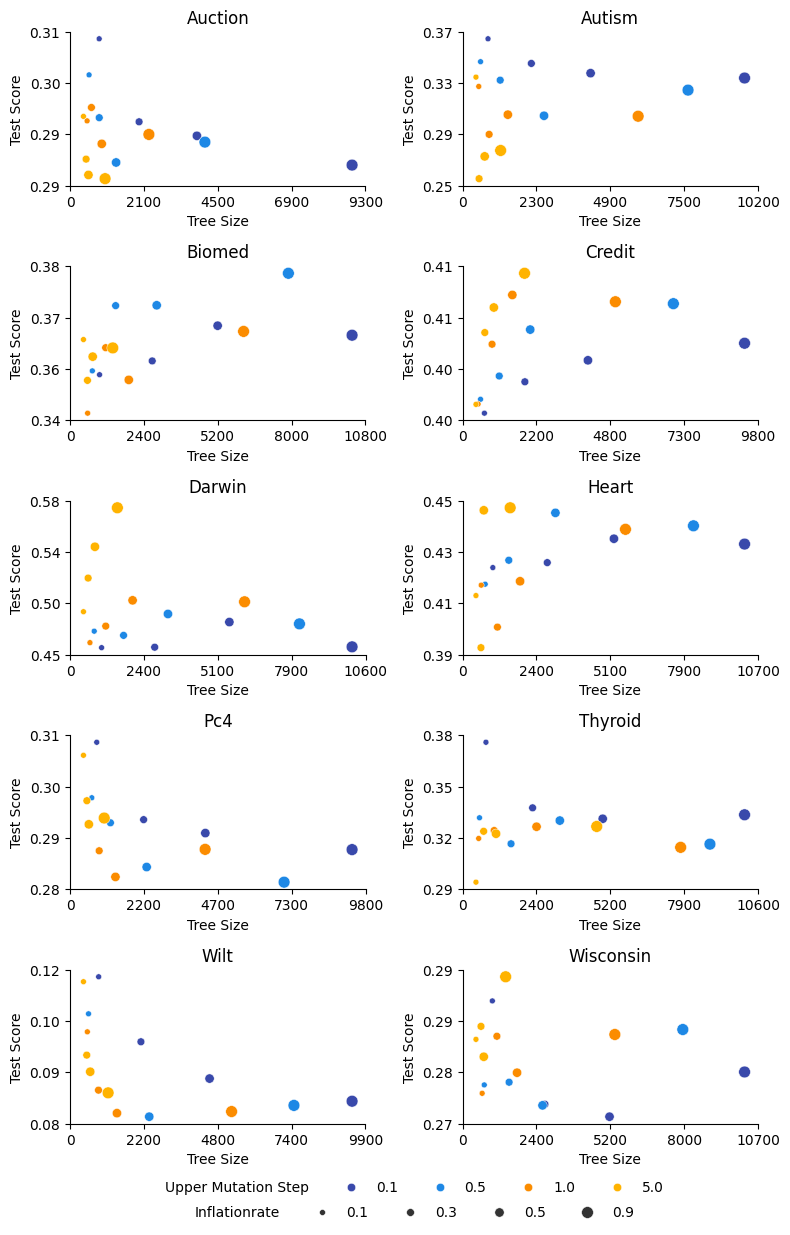

In [12]:
ana_inf.performance_complexity_tradeoff_mulsig1_plot[0]

In [13]:
best = get_best_config_performance_by_p_inflate_and_ms_upper(ana_inf.results)
best_perf = pd.merge(best, ana_inf.results_median[['config_id', 'config.p_inflate', 'config.ms_upper', 'dataset', 'algorithm', 'test.rmse', 'nodes_count']], on=['config_id', 'dataset'], how='left')
best_perf = best_perf[['dataset', 'algorithm', 'config.p_inflate', 'config.ms_upper', 'test.rmse', 'nodes_count']].copy()
best_perf['test.rmse'] = best_perf['test.rmse'].round(5)
best_perf

,dataset,algorithm,config.p_inflate,config.ms_upper,test.rmse,nodes_count
0,Auction,SLIM*SIG1,0.9,5.0,0.28635,796.5
1,Auction,SLIM+SIG1,0.9,0.5,0.27398,4052.5
2,Autism,SLIM*SIG1,0.3,5.0,0.25631,205.0
3,Autism,SLIM+SIG1,0.9,5.0,0.00000,5542.0
4,Biomed,SLIM*SIG1,0.1,1.0,0.34497,290.0
5,Biomed,SLIM+SIG1,0.1,0.1,0.29958,706.5
6,Credit,SLIM*SIG1,0.1,0.1,0.39758,448.0
7,Credit,SLIM+SIG1,0.1,5.0,0.39751,109.0
8,Darwin,SLIM*SIG1,0.1,0.1,0.46032,778.5
9,Darwin,SLIM+SIG1,0.9,0.1,0.32739,8845.5


In [14]:
best_trade = ana_inf.best_config_results_median[['dataset', 'algorithm', 'config.p_inflate', 'config.ms_upper', 'test.rmse',  'nodes_count']].copy()

best_trade['test.rmse'] = best_trade['test.rmse'].round(5)
best_trade

,dataset,algorithm,config.p_inflate,config.ms_upper,test.rmse,nodes_count
0,Auction,SLIM*SIG1,0.5,5.0,0.28697,251.0
1,Auction,SLIM+SIG1,0.5,1.0,0.27863,660.0
2,Autism,SLIM*SIG1,0.3,5.0,0.25631,205.0
3,Autism,SLIM+SIG1,0.3,5.0,0.01133,346.5
4,Biomed,SLIM*SIG1,0.1,1.0,0.34497,290.0
5,Biomed,SLIM+SIG1,0.1,1.0,0.30225,323.0
6,Credit,SLIM*SIG1,0.1,0.1,0.39758,448.0
7,Credit,SLIM+SIG1,0.1,5.0,0.39751,109.0
8,Darwin,SLIM*SIG1,0.1,1.0,0.46445,344.0
9,Darwin,SLIM+SIG1,0.3,0.5,0.36863,1659.5


In [15]:
best = pd.merge(best_perf, best_trade,  on=['dataset', 'algorithm'], how='left')
best['rmse_percentage'] = ((best['test.rmse_y'] - best['test.rmse_x']) / best['test.rmse_x']) * 100
best['rmse_percentage'] = '+' + best['rmse_percentage'].round(3).astype('str') + '%'

best['nodes_count_percentage'] = (best['nodes_count_y'] -best['nodes_count_x'] ) / best['nodes_count_x'] * 100
best['nodes_count_percentage'] = best['nodes_count_percentage'].round(3).astype('str') + '%'


best

,dataset,algorithm,config.p_inflate_x,config.ms_upper_x,test.rmse_x,nodes_count_x,config.p_inflate_y,config.ms_upper_y,test.rmse_y,nodes_count_y,rmse_percentage,nodes_count_percentage
0,Auction,SLIM*SIG1,0.9,5.0,0.28635,796.5,0.5,5.0,0.28697,251.0,+0.217%,-68.487%
1,Auction,SLIM+SIG1,0.9,0.5,0.27398,4052.5,0.5,1.0,0.27863,660.0,+1.697%,-83.714%
2,Autism,SLIM*SIG1,0.3,5.0,0.25631,205.0,0.3,5.0,0.25631,205.0,+0.0%,0.0%
3,Autism,SLIM+SIG1,0.9,5.0,0.00000,5542.0,0.3,5.0,0.01133,346.5,+inf%,-93.748%
4,Biomed,SLIM*SIG1,0.1,1.0,0.34497,290.0,0.1,1.0,0.34497,290.0,+0.0%,0.0%
5,Biomed,SLIM+SIG1,0.1,0.1,0.29958,706.5,0.1,1.0,0.30225,323.0,+0.891%,-54.282%
6,Credit,SLIM*SIG1,0.1,0.1,0.39758,448.0,0.1,0.1,0.39758,448.0,+0.0%,0.0%
7,Credit,SLIM+SIG1,0.1,5.0,0.39751,109.0,0.1,5.0,0.39751,109.0,+0.0%,0.0%
8,Darwin,SLIM*SIG1,0.1,0.1,0.46032,778.5,0.1,1.0,0.46445,344.0,+0.897%,-55.812%
9,Darwin,SLIM+SIG1,0.9,0.1,0.32739,8845.5,0.3,0.5,0.36863,1659.5,+12.597%,-81.239%


In [16]:
# Keep dataset and algorithm first
best = best[[
    'dataset', 'algorithm',
    'config.p_inflate_x', 'config.p_inflate_y',
    'config.ms_upper_x', 'config.ms_upper_y',
    'test.rmse_x', 'test.rmse_y',
    'nodes_count_x', 'nodes_count_y',
    'rmse_percentage', 'nodes_count_percentage'
]]

# Assign MultiIndex to all except 'dataset' and 'algorithm'
multi_cols = pd.MultiIndex.from_tuples([
    ('dataset', ''), ('algorithm', ''),
    ('config.p_inflate', ' RMSE'), ('config.p_inflate', ' Tradeoff'),
    ('config.ms_upper', ' RMSE'), ('config.ms_upper', ' Tradeoff'),
    ('test.rmse', ' RMSE'), ('test.rmse', ' Tradeoff'),
    ('nodes_count', ' RMSE'), ('nodes_count', ' Tradeoff'),
    ('rmse_percentage', ''), ('nodes_count_percentage', '')
])

best.columns = multi_cols

best


dataset  algorithm config.p_inflate           config.ms_upper            \
                                     RMSE  Tradeoff            RMSE  Tradeoff   
0     Auction  SLIM*SIG1              0.9       0.5             5.0       5.0   
1     Auction  SLIM+SIG1              0.9       0.5             0.5       1.0   
2      Autism  SLIM*SIG1              0.3       0.3             5.0       5.0   
3      Autism  SLIM+SIG1              0.9       0.3             5.0       5.0   
4      Biomed  SLIM*SIG1              0.1       0.1             1.0       1.0   
5      Biomed  SLIM+SIG1              0.1       0.1             0.1       1.0   
6      Credit  SLIM*SIG1              0.1       0.1             0.1       0.1   
7      Credit  SLIM+SIG1              0.1       0.1             5.0       5.0   
8      Darwin  SLIM*SIG1              0.1       0.1             0.1       1.0   
9      Darwin  SLIM+SIG1              0.9       0.3             0.1       0.5   
10      Heart  SLIM*SIG1              0.3       0.3             5.0       5.0   
11      Heart  SLIM+SIG1              0.3       0.1             0.1       1.0   
12        Pc4  SLIM*SIG1              0.9       0.5             0.5       1.0   
13        Pc4  SLIM+SIG1              0.3       0.3             0.5       0.5   
14    Thyroid  SLIM*SIG1              0.1       0.1             5.0       5.0   
15    Thyroid  SLIM+SIG1              0.3       0.1             1.0       1.0   
16       Wilt  SLIM*SIG1              0.5       0.5             0.5       1.0   
17       Wilt  SLIM+SIG1              0.9       0.5             0.5       5.0   
18  Wisconsin  SLIM*SIG1              0.5       0.1             0.1       1.0   
19  Wisconsin  SLIM+SIG1              0.1       0.1             1.0       1.0   

   test.rmse           nodes_count           rmse_percentage  \
        RMSE  Tradeoff        RMSE  Tradeoff                   
0    0.28635   0.28697       796.5     251.0         +0.217%   
1    0.27398   0.27863      4052.5     660.0         +1.697%   
2    0.25631   0.25631       205.0     205.0           +0.0%   
3    0.00000   0.01133      5542.0     346.5           +inf%   
4    0.34497   0.34497       290.0     290.0           +0.0%   
5    0.29958   0.30225       706.5     323.0         +0.891%   
6    0.39758   0.39758       448.0     448.0           +0.0%   
7    0.39751   0.39751       109.0     109.0           +0.0%   
8    0.46032   0.46445       778.5     344.0         +0.897%   
9    0.32739   0.36863      8845.5    1659.5        +12.597%   
10   0.39118   0.39118       288.5     288.5           +0.0%   
11   0.36523   0.37101      2143.5     289.0         +1.583%   
12   0.28072   0.28170      7002.0    1175.5         +0.349%   
13   0.27139   0.27139       945.0     945.0           +0.0%   
14   0.29063   0.29063       207.0     207.0           +0.0%   
15   0.19482   0.21034      1006.0     293.0         +7.966%   
16   0.08043   0.08128      2389.5    1262.5         +1.057%   
17   0.05840   0.06130      6500.0     370.0         +4.966%   
18   0.26851   0.27259      5153.5     355.5         +1.519%   
19   0.23982   0.23982       360.0     360.0           +0.0%   

   nodes_count_percentage  
                           
0                -68.487%  
1                -83.714%  
2                    0.0%  
3                -93.748%  
4                    0.0%  
5                -54.282%  
6                    0.0%  
7                    0.0%  
8                -55.812%  
9                -81.239%  
10                   0.0%  
11               -86.517%  
12               -83.212%  
13                   0.0%  
14                   0.0%  
15               -70.875%  
16               -47.165%  
17               -94.308%  
18               -93.102%  
19                   0.0%

In [17]:
best.rename(columns={'algorithm': 'Version',
                     'config.p_inflate': 'Inflationrate',
                        'config.ms_upper': 'Upper MS',
                        'test.rmse': 'RMSE',
                        'nodes_count': 'Tree Size',
                        'rmse_percentage': 'RMSE %',
                        'nodes_count_percentage': 'Tree Size %'
                     }, inplace=True)
best

dataset    Version Inflationrate           Upper MS               RMSE  \
                                  RMSE  Tradeoff     RMSE  Tradeoff     RMSE   
0     Auction  SLIM*SIG1           0.9       0.5      5.0       5.0  0.28635   
1     Auction  SLIM+SIG1           0.9       0.5      0.5       1.0  0.27398   
2      Autism  SLIM*SIG1           0.3       0.3      5.0       5.0  0.25631   
3      Autism  SLIM+SIG1           0.9       0.3      5.0       5.0  0.00000   
4      Biomed  SLIM*SIG1           0.1       0.1      1.0       1.0  0.34497   
5      Biomed  SLIM+SIG1           0.1       0.1      0.1       1.0  0.29958   
6      Credit  SLIM*SIG1           0.1       0.1      0.1       0.1  0.39758   
7      Credit  SLIM+SIG1           0.1       0.1      5.0       5.0  0.39751   
8      Darwin  SLIM*SIG1           0.1       0.1      0.1       1.0  0.46032   
9      Darwin  SLIM+SIG1           0.9       0.3      0.1       0.5  0.32739   
10      Heart  SLIM*SIG1           0.3       0.3      5.0       5.0  0.39118   
11      Heart  SLIM+SIG1           0.3       0.1      0.1       1.0  0.36523   
12        Pc4  SLIM*SIG1           0.9       0.5      0.5       1.0  0.28072   
13        Pc4  SLIM+SIG1           0.3       0.3      0.5       0.5  0.27139   
14    Thyroid  SLIM*SIG1           0.1       0.1      5.0       5.0  0.29063   
15    Thyroid  SLIM+SIG1           0.3       0.1      1.0       1.0  0.19482   
16       Wilt  SLIM*SIG1           0.5       0.5      0.5       1.0  0.08043   
17       Wilt  SLIM+SIG1           0.9       0.5      0.5       5.0  0.05840   
18  Wisconsin  SLIM*SIG1           0.5       0.1      0.1       1.0  0.26851   
19  Wisconsin  SLIM+SIG1           0.1       0.1      1.0       1.0  0.23982   

             Tree Size              RMSE % Tree Size %  
    Tradeoff      RMSE  Tradeoff                        
0    0.28697     796.5     251.0   +0.217%    -68.487%  
1    0.27863    4052.5     660.0   +1.697%    -83.714%  
2    0.25631     205.0     205.0     +0.0%        0.0%  
3    0.01133    5542.0     346.5     +inf%    -93.748%  
4    0.34497     290.0     290.0     +0.0%        0.0%  
5    0.30225     706.5     323.0   +0.891%    -54.282%  
6    0.39758     448.0     448.0     +0.0%        0.0%  
7    0.39751     109.0     109.0     +0.0%        0.0%  
8    0.46445     778.5     344.0   +0.897%    -55.812%  
9    0.36863    8845.5    1659.5  +12.597%    -81.239%  
10   0.39118     288.5     288.5     +0.0%        0.0%  
11   0.37101    2143.5     289.0   +1.583%    -86.517%  
12   0.28170    7002.0    1175.5   +0.349%    -83.212%  
13   0.27139     945.0     945.0     +0.0%        0.0%  
14   0.29063     207.0     207.0     +0.0%        0.0%  
15   0.21034    1006.0     293.0   +7.966%    -70.875%  
16   0.08128    2389.5    1262.5   +1.057%    -47.165%  
17   0.06130    6500.0     370.0   +4.966%    -94.308%  
18   0.27259    5153.5     355.5   +1.519%    -93.102%  
19   0.23982     360.0     360.0     +0.0%        0.0%

In [18]:
get_min_euclidian_distance(ana_inf.results)

c:\Users\leond\OneDrive\Desktop\MasterThesis\slim\mastero\experiments\analysis.py:305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['euclidian_distance'] = (subset['test.rmse']**2 + 2*subset['nodes_count']**2)**0.5
c:\Users\leond\OneDrive\Desktop\MasterThesis\slim\mastero\experiments\analysis.py:305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['euclidian_distance'] = (subset['test.rmse']**2 + 2*subset['nodes_count']**2)**0.5
c:\Users\leond\OneDrive\Desktop\MasterThesis\slim\mastero\experime

,config_id,run_id,nodes_count,algorithm,oversampling,config.pop_size,config.n_iter,config.elitism,config.n_elites,config.init_depth,...,train.recall,test.rmse,test.wrmse,test.accuracy,test.roc_auc,test.f1_score,test.precision,test.recall,dataset,euclidian_distance
0,24,3,0.016828,SLIM*SIG1,False,100,1000,True,1,6,...,0.196721,0.009288,0.512550,0.892333,0.838311,0.297872,0.933333,0.177215,Auction,0.025547
1,43,6,0.082141,SLIM+SIG1,False,100,1000,True,1,6,...,0.360656,0.136949,0.476632,0.920065,0.850614,0.581197,0.894737,0.430380,Auction,0.179581
2,32,3,0.001056,SLIM*SIG1,False,100,1000,True,1,6,...,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Autism,0.001493
3,40,8,0.026885,SLIM+SIG1,False,100,1000,True,1,6,...,1.000000,0.030635,0.010847,1.000000,1.000000,1.000000,1.000000,1.000000,Autism,0.048828
4,24,1,0.009053,SLIM*SIG1,False,100,1000,True,1,6,...,0.730769,0.000000,0.304405,0.904762,0.941304,0.857143,0.947368,0.782609,Biomed,0.012803
5,40,6,0.023733,SLIM+SIG1,False,100,1000,True,1,6,...,0.903846,0.125007,0.248572,0.952381,0.948913,0.930233,1.000000,0.869565,Biomed,0.129434
6,20,6,0.000000,SLIM*SIG1,False,100,1000,True,1,6,...,0.000000,0.005935,0.568447,0.798817,0.651362,0.000000,0.000000,0.000000,Credit,0.005935
7,36,1,0.007600,SLIM+SIG1,False,100,1000,True,1,6,...,0.000000,0.008490,0.570458,0.798817,0.637909,0.000000,0.000000,0.000000,Credit,0.013697
8,19,4,0.028242,SLIM*SIG1,False,100,1000,True,1,6,...,0.779661,0.066186,0.426894,0.735849,0.826211,0.740741,0.714286,0.769231,Darwin,0.077304
9,34,7,0.048453,SLIM+SIG1,False,100,1000,True,1,6,...,0.949153,0.088788,0.299423,0.849057,0.962963,0.857143,0.800000,0.923077,Darwin,0.112154


In [19]:

X = ana_inf.results[['config.p_inflate', 'config.ms_upper', 'dataset_name', 'name']]
X = pd.get_dummies(X, columns=['dataset_name', 'name'], prefix='dataset', drop_first=True)
y = ana.results['nodes_count']
lr = LinearRegression()
lr.fit(X, y)
r2_score(y, lr.predict(X))

KeyError: "['dataset_name', 'name'] not in index"

(array([7003.59709821, -542.20042595]), 137.87880549860574)